# Tracking bottlenecks in the Muesli orders process

In [212]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# hides warning messages
import warnings
warnings.filterwarnings("ignore")

#style for the plots
plt.style.use('fivethirtyeight')


In [213]:
#read data 
orders = pd.read_excel('data/muesli_raw_data.xlsx', header=1) #Please change your patch accordingly
orders.head(2)


,Index,Order ID,Order Date,Ship mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


**Create dataframes for each excel sheet:**

In [214]:
#clean orders dataframe
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ","_")
orders.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [215]:
#create arrival df
arrival= pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Campaign Data')

#clean arrival df
arrival.columns = arrival.columns.str.lower()
arrival.columns = arrival.columns.str.replace(" ","_")
arrival.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [216]:
#create truck df
truck = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Order Process Data')

#clean truck df
truck.columns = truck.columns.str.lower()
truck.columns = truck.columns.str.replace(" ","_")
truck.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [217]:
truck.drop('row_id', axis=1)

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...
5894,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing
5897,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [218]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   float64       
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 230.6+ KB


In [219]:
#create ready_pickup df
ready_pickup = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='InternData Study')

#clean ready_pickup df
ready_pickup.columns = ready_pickup.columns.str.lower()
ready_pickup.columns = ready_pickup.columns.str.replace(" ","_")
ready_pickup.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


# Inspecting Duplicates

In [220]:
duplicates_df1 = df1[df1.duplicated(keep=False)].shape
print(f'duplicates for df1: {duplicates_df1[0]}') 

duplicates_arrival = arrival[arrival.duplicated(keep=False)].shape
print(f'duplicates for arrival: {duplicates_arrival[0]}')

duplicates_truck = truck[truck.duplicated(keep=False)].shape
print(f'duplicates for truck: {duplicates_truck[0]}')

duplicates_ready_pickup = ready_pickup[ready_pickup.duplicated(keep=False)].shape
print(f'duplicates for ready_pickup: {duplicates_ready_pickup[0]}')

duplicates for df1: 0
duplicates for arrival: 0
duplicates for truck: 0
duplicates for ready_pickup: 147


In [221]:
# dropping and corroborating duplicates in ready_pickup

ready_pickup.drop_duplicates(subset='order_id', inplace=True)
duplicates_ready_pickup = ready_pickup[ready_pickup.duplicated(keep=False)].shape
print(f'duplicates for ready_pickup: {duplicates_ready_pickup[0]}')

duplicates for ready_pickup: 0


# Joining dataframes to measure the  overall lead time of the muesli orders (1° KPI)

In [222]:
#joining orders and arrivals = df1
df1= pd.merge(orders, arrival, on= "order_id", how= "inner")
df1.drop_duplicates(subset='order_id', inplace=True)
df1.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,...,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y
0,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13.0,0.0,636.0003,2019-09-23,Kelly Collister
2,325.0,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1.0,0.0,34.9965,2019-05-06,Grace Kelly


In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 667
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              333 non-null    float64       
 1   order_id           333 non-null    object        
 2   order_date         333 non-null    datetime64[ns]
 3   ship_mode          333 non-null    object        
 4   customer_id        333 non-null    object        
 5   customer_name_x    333 non-null    object        
 6   origin_channel     333 non-null    object        
 7   country/region     333 non-null    object        
 8   city               333 non-null    object        
 9   state              333 non-null    object        
 10  postal_code        333 non-null    float64       
 11  region             333 non-null    object        
 12  category           333 non-null    object        
 13  sub-category       333 non-null    object        
 14  product_id

**Time between the order date and the arrival to the customer**

In [224]:
#df1 has order dates and arrivals for the gerneral lead time kpi
df1 = df1[["order_id", "order_date", "arrival_scan_date"]]

#create columns for day difference
df1["day_dif_order"]= (df1["arrival_scan_date"]-df1["order_date"]).dt.days
df1.head(2)


,order_id,order_date,arrival_scan_date,day_dif_order
0,CA-2019-145625,2019-09-11,2019-09-23,12
2,CA-2019-162138,2019-04-23,2019-05-06,13


**Plotting overall lead time**

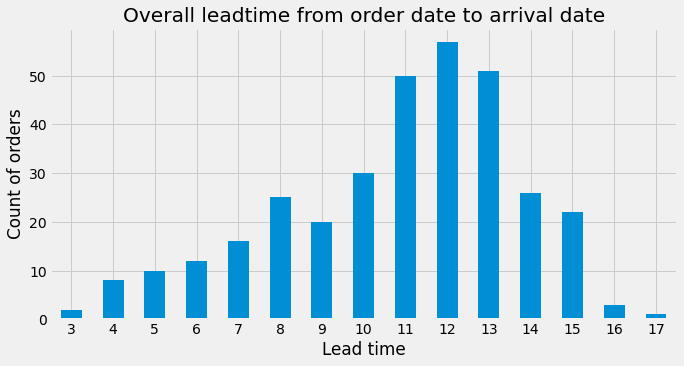

In [225]:
fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.bar(rot=360) 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');

**Findings**  
There's not enough data here because the arrival data is only available for the 3.3% of the orders, so it is not representative of the whole case.
The man of the overall time is 11 days and the range is 14 days.


In [226]:
#summary statistics for first kpi
#according to company estimation it should take 13 day in the worth case.
df1.describe()["day_dif_order"].round(1)

count    333.0
mean      10.8
std        2.9
min        3.0
25%        9.0
50%       11.0
75%       13.0
max       17.0
Name: day_dif_order, dtype: float64

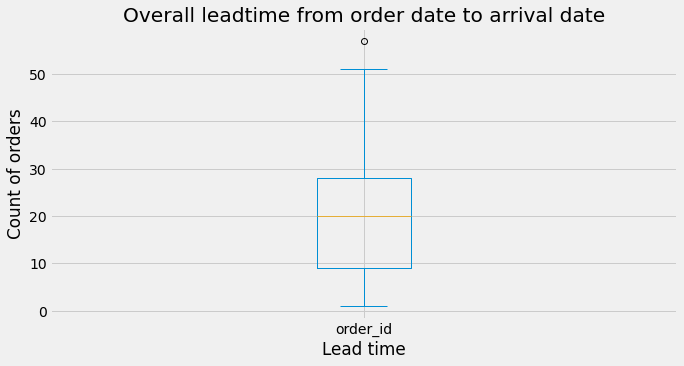

In [227]:
#boxplot to see the outliers in the delivary dates
fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.box() 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');


**Findings**  
According to box plot more than half of orders had the delivery date more then 12 days (which is the median)

**Making the 1° KPI more specific: Calculating lead time according to the shipping method**

In [228]:
#joining df1 and truck for ship method
# lead_t_shipmode = pd.concat([df1, truck], axis=1, join='inner
lead_t_shipmode = df1.merge(truck, how='inner', on='order_id', suffixes=('_ord', 'truck_'))
lead_t_shipmode.head(2)

,order_id,order_date_ord,arrival_scan_date,day_dif_order,row_id,order_datetruck_,on_truck_scan_date,ship_mode
0,CA-2019-145625,2019-09-11,2019-09-23,12,251.0,2019-09-11,2019-09-18,Standard Processing
1,CA-2019-145625,2019-09-11,2019-09-23,12,252.0,2019-09-11,2019-09-18,Standard Processing


In [229]:
lead_t_shipmode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            668 non-null    object        
 1   order_date_ord      668 non-null    datetime64[ns]
 2   arrival_scan_date   668 non-null    datetime64[ns]
 3   day_dif_order       668 non-null    int64         
 4   row_id              668 non-null    float64       
 5   order_datetruck_    668 non-null    datetime64[ns]
 6   on_truck_scan_date  668 non-null    datetime64[ns]
 7   ship_mode           668 non-null    object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(2)
memory usage: 47.0+ KB


In [230]:
lead_t_shipmode.describe()

,day_dif_order,row_id
count,668.000000,668.000000
mean,10.886228,4895.901198
std,2.878174,2989.513912
min,3.000000,1.000000
25%,9.000000,2170.750000
50%,12.000000,4949.000000
75%,13.000000,7522.250000
max,17.000000,9987.000000


In [231]:
#choosing the columns we need and cleaning columns
lead_t_shipmode = lead_t_shipmode[['order_id', 'order_date_ord', 'day_dif_order', 'ship_mode']]
lead_t_shipmode.head(2)

,order_id,order_date_ord,day_dif_order,ship_mode
0,CA-2019-145625,2019-09-11,12,Standard Processing
1,CA-2019-145625,2019-09-11,12,Standard Processing


In [232]:
#shipment aggregated by overall lead time
kpi1 = pd.crosstab(lead_t_shipmode['day_dif_order'], columns=lead_t_shipmode['ship_mode'])
kpi1 

ship_mode,Express,Standard Processing
day_dif_order,,
3,3,0
4,14,0
5,26,0
6,22,4
7,14,11
8,30,26
9,12,22
10,15,44
11,5,81


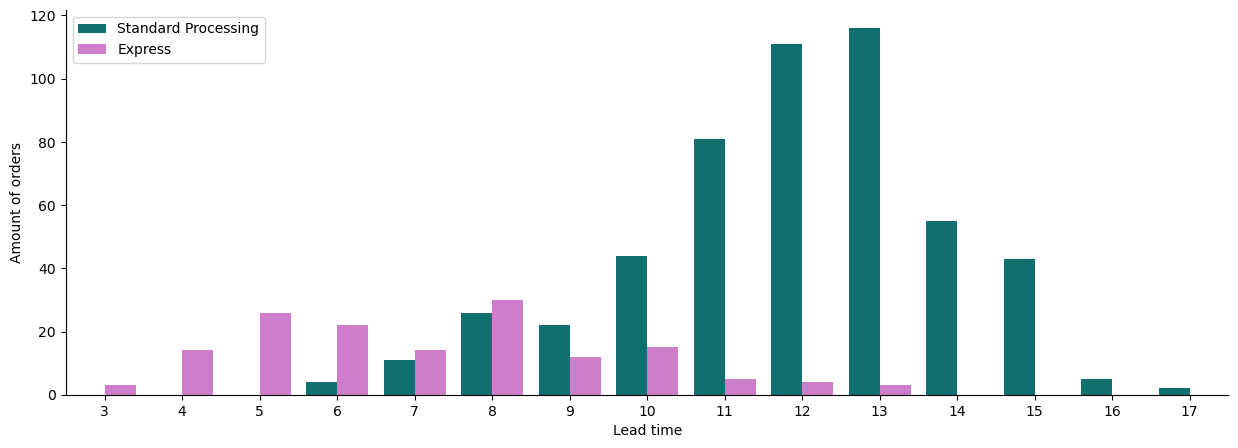

In [233]:
# using seaborn to plot
with plt.style.context('default'): #evoke style temporarily
    
    fig = plt.figure(figsize=(15,5))
    fig = sns.countplot( x=lead_t_shipmode['day_dif_order'], hue=lead_t_shipmode['ship_mode'], palette=['#008080', '#da70d6']) #hue serves as group by
    plt.legend(loc='upper left')
    fig.set_xlabel('Lead time')
    fig.set_ylabel('Amount of orders')
    # plt.box(on=None) #this line takes all the box off
    fig.spines['right'].set_color('none') # turn off the right spine
    fig.spines['top'].set_color('none') #turn off the top spine


In [235]:
lead_t_shipmode.rename(columns={'day_dif_order': 'Avg. Lead Time', 'truck_day_dif': 'Days for order to be ready', 'ship_mode': 'Shipping Mode'}, inplace=True)
lead_t_shipmode.groupby('Shipping Mode').mean().round(1)

,Avg. Lead Time
Shipping Mode,
Express,7.2
Standard Processing,11.9


**Findings**  
- In average, the lead time has 5 days difference between shipment methods 
- Mean for lead time is 11 days
- Express is faster as expected



# Time between order date and loading Muesli in the truck (2° KPI)


In [236]:
#we don't need to join orders with truck because the 5899 entries already have both the order_date and the truck_date

#create columns for day difference
truck['truck_day_dif'] = (truck['on_truck_scan_date'] - truck['order_date']).dt.days
truck.head(2)


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express,4
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7


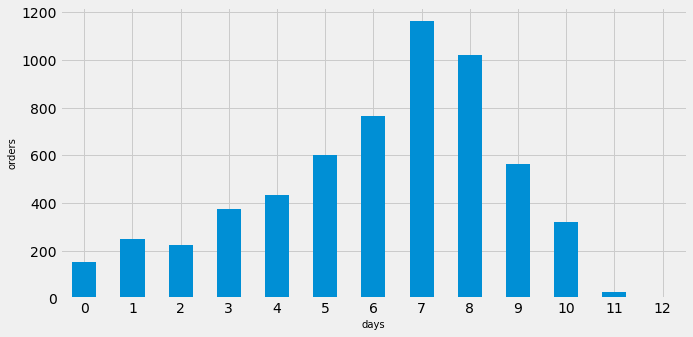

In [237]:
#plotting leadtime_muesli
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.bar(rot=360) 
)

ax.set_xlabel('days', fontsize=10);
ax.set_ylabel('orders', fontsize=10);

Summary statistics for the second kpi (order-date and on truck delivery date)

It should take 6 days at the worse case.
we have complete data

In [238]:
truck.describe()["truck_day_dif"].round(1)

count    5899.0
mean        6.1
std         2.5
min         0.0
25%         5.0
50%         7.0
75%         8.0
max        12.0
Name: truck_day_dif, dtype: float64

**Box plot for 2° KPI**  
- It takes 6 days in avegerage to load the order in the truck
- Most of the orders take 7 or more days to be loaded
In next step we want to see what happens from ready to ship date and on truck scan date.

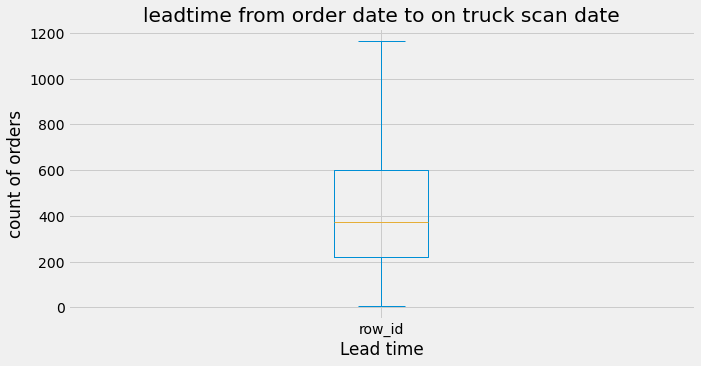

In [239]:
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.box() 
)
ax.set_title('leadtime from order date to on truck scan date')

ax.set_xlabel('Lead time');
ax.set_ylabel('count of orders');

# Time between ready to ship date and being loaded in the truck (3° KPI)

In [240]:
#join truck and ready_pickup
df3= pd.merge(truck, ready_pickup, on= "order_id", how= "inner")
df3.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif,ready_to_ship_date,pickup_date
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03
1,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03


In [241]:
# lead time from on truck scan date and ready to ship date
df3['ready_to_ship_on_truck_dif'] = (df3['on_truck_scan_date'] - df3['ready_to_ship_date']).dt.days
df3.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif,ready_to_ship_date,pickup_date,ready_to_ship_on_truck_dif
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03,1
1,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03,1


In [242]:
df3['ready_to_ship_on_truck_dif'].value_counts()


2    164
1    107
3     84
0     63
Name: ready_to_ship_on_truck_dif, dtype: int64

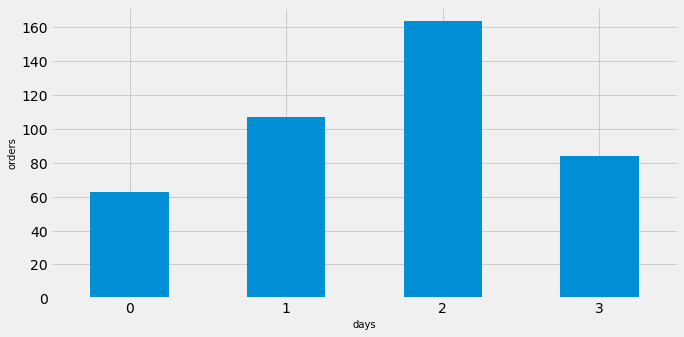

In [243]:
# plotting leadtime from ready to ship date to on truck scan date
fig, ax = plt.subplots(figsize=(10,5))
(
    df3
    .groupby('ready_to_ship_on_truck_dif')
    .count()['order_id']
    .plot.bar(rot=360)
    
)
ax.set_xlabel('days', fontsize=10);
ax.set_ylabel('orders', fontsize=10);

**Findings**  
- Data here is insufficient to be representative of the whole case.
- According to company estimation it should take 3 days at the worth case
- They are complying to the times, based on the data that we have.
- The mode of is 2 days, showing a good performance.

In [244]:
df3.describe()['ready_to_ship_on_truck_dif'].round(1)

count    418.0
mean       1.6
std        1.0
min        0.0
25%        1.0
50%        2.0
75%        2.0
max        3.0
Name: ready_to_ship_on_truck_dif, dtype: float64

# Lead time between on truck scan date and arrival scan date 

In [245]:
#merging truck and arrival info
shipment = pd.merge(truck, arrival, on="order_id", how= "right")
#created a column for weekday
shipment["on_truck_arrival_diff"]= (shipment["arrival_scan_date"] - shipment["on_truck_scan_date"]).dt.days
#count the values
shipment["on_truck_arrival_diff"].value_counts()
shipment.describe().round()

,row_id,truck_day_dif,on_truck_arrival_diff
count,668.0,668.0,668.0
mean,4896.0,6.0,5.0
std,2990.0,3.0,1.0
min,1.0,0.0,1.0
25%,2171.0,5.0,4.0
50%,4949.0,7.0,5.0
75%,7522.0,8.0,5.0
max,9987.0,12.0,7.0


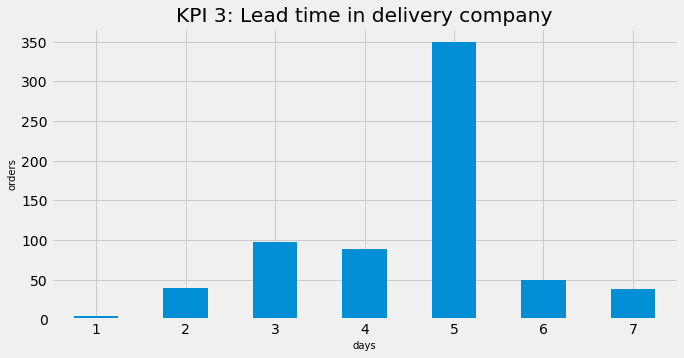

In [246]:
fig, ax = plt.subplots(figsize=(10,5))
(
    shipment
    .groupby("on_truck_arrival_diff")
    .count()['order_id']
    .plot.bar(rot=360) 
)

ax.set_xlabel('days', fontsize = 10);
ax.set_ylabel('orders', fontsize = 10)
ax.set_title('KPI 3: Lead time in delivery company');

**Findings**
- According to company estimations, orders should take about 5 days since they leave the muesli company and get to the customer
- Orders are arriving to costumers on average in less than 5 days, showing a good performance in the delivery company process
- Most of the orders take 5 days or less. 

# Extra information: when are the customers ordering?

In [254]:
#create columns for orders date
orders["orders_weekday"]= (orders['order_date']).dt.dayofweek
when_orders_made = orders.groupby('orders_weekday').order_id.count()
print(when_orders_made)

orders_weekday
0    1408
1    1783
2    1706
3    1736
4    1648
5     876
6     837
Name: order_id, dtype: int64


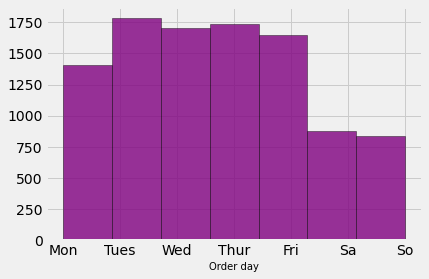

In [250]:
#Plot the orders in days
plt.hist(x=orders['orders_weekday'], bins=7, alpha=0.8, edgecolor='k', color='purple');
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sa', 'So']);
plt.xlabel('Order day', fontsize = 10);

**Findings**  


In [279]:
total_orders = orders['orders_weekday'].count()
print(total_orders) # 9994
week = 1408 + 1783 + 1706 + 1736 + 1648
weekend = total_orders - week
print(f'{round(week*100/total_orders)}% of the orders are made during the week')
print(f'{round(weekend*100/total_orders)}% of the orders are made during the weekend')

9994
83% of the orders are made during the week
17% of the orders are made during the weekend
